In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
save_path = '' #LO's path
# save_path = './fig/' #YC's path

### Functions to simulate PCR

In [3]:
def sim_random_access_eff_uniFileSize(primer_specs):
    num_files, n_row, n_col = primer_specs
    pool = np.reshape(np.ones(num_files), (n_row, n_col))
    amp_efficiency = 0.9
    cycle = 15
    ra_eff_bfPCR_list, ra_eff_afPCR_list = [], []
    for row in range(n_row):
        for col in range(n_col):
            pool_pcr = np.copy(pool) 
            pool_pcr[row,col] = pool[row,col]*(1+amp_efficiency)**cycle
            dsDNA = sum(pool[row,:])-pool[row,col]+pool_pcr[row,col]
            ds_filter_ra_eff = 100*pool_pcr[row,col]/dsDNA
            ra_eff_afPCR_list.append(ds_filter_ra_eff)
            ra_eff_bfPCR_list.append(100.0*pool[row,col]/np.sum(pool))
    return (ra_eff_bfPCR_list, ra_eff_afPCR_list)

def sim_random_access_eff_ranFileSize(primer_specs):
    max_file_size, n_row, n_col = primer_specs
    pool = np.random.randint(low=1, high=max_file_size, size=(n_row, n_col))
    amp_efficiency = 0.9
    cycle = 15
    #ra_eff_afPCR, ra_eff_bfPCR = [], []
    ra_eff_bfPCR_list, ra_eff_afPCR_list = [], []
    for row in range(n_row):
        for col in range(n_col):
            pool_pcr = np.copy(pool)
            pool_pcr[row,col] = pool[row,col]*(1+amp_efficiency)**cycle
            dsDNA = sum(pool[row,:])-pool[row,col]+pool_pcr[row,col]
            ds_filter_ra_eff = 100*pool_pcr[row,col]/dsDNA
            ra_eff_afPCR_list.append(ds_filter_ra_eff)
            ra_eff_bfPCR_list.append(100.0*pool[row,col]/np.sum(pool))
    return (ra_eff_bfPCR_list, ra_eff_afPCR_list)

def sim_random_access_eff_linspaceFileSize(primer_specs):
    pool_size, n_row, n_col = primer_specs
    max_file_size = 1000
    pool = np.reshape(np.linspace(1,max_file_size, num=pool_size), (n_row, n_col))
    amp_efficiency = 0.9
    cycle = 15
    ra_eff_afPCR_list, ra_eff_bfPCR_list = [], []
    for row in range(n_row):
        for col in range(n_col):
            pool_pcr = np.copy(pool)
            pool_pcr[row,col] = pool[row,col]*(1+amp_efficiency)**cycle
            dsDNA = sum(pool[row,:])-pool[row,col]+pool_pcr[row,col]
            ds_filter_ra_eff = 100*pool_pcr[row,col]/dsDNA
            ra_eff_afPCR_list.append(ds_filter_ra_eff)
            ra_eff_bfPCR_list.append(100.0*pool[row,col]/np.sum(pool))
    return (ra_eff_bfPCR_list, ra_eff_afPCR_list)

### Functions to shape and plot the PCR simulation data

In [4]:
def plot_sim_pcr_data(sim_pcr, title, save_path, fname):
    """ 
    Given a panda dataframe of simulated PCR data, a string that is the title of the plot,
    a string that is the path to save the image (i.e., './dir/'), 
    and a string that is the saved file's name (i.e., 'my_fig.png'),
    saves a box plot of the data
    """
    sns.set_theme(style="whitegrid")
    ax = sns.boxplot(x="Number of Files", y="Target File % of Pool", hue="PCR",
                     data=sim_pcr, palette="Set2")
    ax.set_title(title)
    ax.set_xlabel('Number of Files')
    ax.set_ylabel('Target File % of Pool')
    filename = save_path + fname
    plt.show()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.clf()
    
def make_pcr_sim_dict(ra_eff_bfPCR, ra_eff_afPCR, pspec, sim_pcr):
    """
    Given two lists that are the PCR frequency data before and after PCR,
    and a primer spec list (num of files, num of forward primers, num of reverse primers),
    and a sim_pcr dictionary,
    returns a panda that's a dictionary that can be plotted
    """
        
    for i in range(len(ra_eff_bfPCR)):
            # fill in data for Before PCR
            sim_pcr["Number of Files"].append(pspec[0])
            sim_pcr["Target File % of Pool"].append(ra_eff_bfPCR[i])
            sim_pcr["PCR"].append('Before')
            # fill in data for After PCR
            sim_pcr["Number of Files"].append(pspec[0])
            sim_pcr["Target File % of Pool"].append(ra_eff_afPCR[i])
            sim_pcr["PCR"].append('After')
    return sim_pcr
            

## Perform and plot PCR simulations

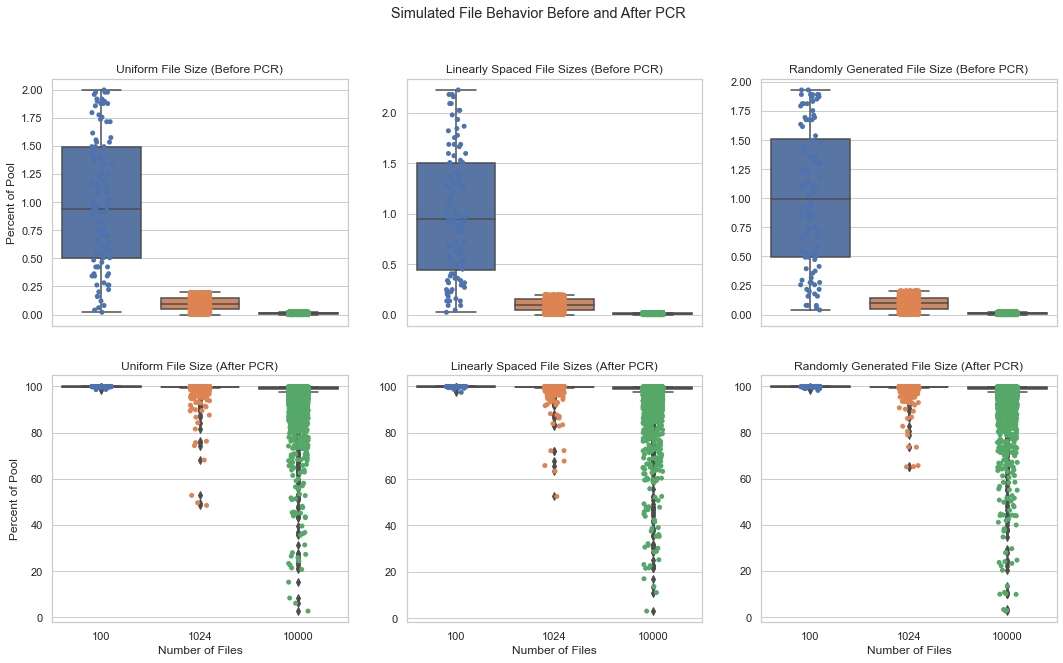

<Figure size 432x288 with 0 Axes>

In [5]:
def make_pcr_sim_dict_subfigs(ra_eff_bfPCR, ra_eff_afPCR, pspec, sim_pcr, method):
    bf_col_label = method + "-" + "Before PCR"
    af_col_label = method + '-' + 'After PCR'
    if bf_col_label not in sim_pcr.keys(): # initialize dictionary if needed
        sim_pcr[bf_col_label] = []
        sim_pcr[af_col_label] = []
    for i in range(len(ra_eff_bfPCR)):
        # only initialize this once, it's identical order for all methods
        # NOTE- CHANGE THIS IF YOU CHANGE NUMBER OF FILES BEING ANALYZED
        if len(sim_pcr['Number of Files']) < 11124: 
            sim_pcr['Number of Files'].append(pspec[0])
        sim_pcr[bf_col_label].append(ra_eff_bfPCR[i]) # before PCR
        sim_pcr[af_col_label].append(ra_eff_afPCR[i]) # after PCR
    return sim_pcr

def boxplots_sim_pcr_data_subfigs(sim_pcr, save_path, fname):
    """ 
    Given a panda dataframe of simulated PCR data, a string that is the title of the plot,
    a string that is the path to save the image (i.e., './dir/'), 
    and a string that is the saved file's name (i.e., 'my_fig.png'),
    saves a box plot of the data
    """
    
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(2, 3, sharex=True, figsize=(18, 10))
    fig.suptitle('Simulated File Behavior Before and After PCR')
    ylab = 'Percent of Pool'
    
    sns.boxplot(ax=axes[0, 0], data=sim_pcr, x='Number of Files', y='Uniform File Size-Before PCR')
    sns.stripplot(ax=axes[0, 0], data=sim_pcr, x="Number of Files", y="Uniform File Size-Before PCR", dodge=True)
    axes[0,0].set_title('Uniform File Size (Before PCR)')
    axes[0,0].set_ylabel(ylab)
    axes[0,0].set_xlabel('')
    
    sns.boxplot(ax=axes[1, 0], data=sim_pcr, x='Number of Files', y='Uniform File Size-After PCR')
    sns.stripplot(ax=axes[1, 0], data=sim_pcr, x="Number of Files", y="Uniform File Size-After PCR", dodge=True)
    axes[1,0].set_title('Uniform File Size (After PCR)')
    axes[1,0].set_ylabel(ylab)

    
    sns.boxplot(ax=axes[0, 1], data=sim_pcr, x='Number of Files', y='Linearly Spaced File Sizes-Before PCR')
    sns.stripplot(ax=axes[0, 1], data=sim_pcr, x="Number of Files", y="Linearly Spaced File Sizes-Before PCR", dodge=True)
    axes[0,1].set_title('Linearly Spaced File Sizes (Before PCR)')
    axes[0,1].set_ylabel('')
    axes[0,1].set_xlabel('')

    
    sns.boxplot(ax=axes[1, 1], data=sim_pcr, x='Number of Files', y='Linearly Spaced File Sizes-After PCR')
    sns.stripplot(ax=axes[1, 1], data=sim_pcr, x="Number of Files", y="Linearly Spaced File Sizes-After PCR", dodge=True)
    axes[1,1].set_title('Linearly Spaced File Sizes (After PCR)')
    axes[1,1].set_ylabel('')
    
    sns.boxplot(ax=axes[0, 2], data=sim_pcr, x='Number of Files', y='Randomly Generated File Size-Before PCR')
    sns.stripplot(ax=axes[0, 2], data=sim_pcr, x="Number of Files", y='Randomly Generated File Size-Before PCR', dodge=True)
    axes[0,2].set_title('Randomly Generated File Size (Before PCR)')
    axes[0,2].set_ylabel('')
    axes[0,2].set_xlabel('')

    sns.boxplot(ax=axes[1, 2], data=sim_pcr, x='Number of Files', y='Randomly Generated File Size-After PCR')
    sns.stripplot(ax=axes[1, 2], data=sim_pcr, x="Number of Files", y="Randomly Generated File Size-After PCR", dodge=True)
    axes[1,2].set_title('Randomly Generated File Size (After PCR)')
    axes[1,2].set_ylabel('')

    filename = save_path + fname
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    plt.clf()
    

primer_specs_to_analyze = [[100,10,10], [1024, 32, 32], [10000, 100,100]]
sim_pcr = {"Number of Files": []}
methods = ["Uniform File Size", "Randomly Generated File Size", "Linearly Spaced File Sizes"]

for method in methods:
    for pspec in primer_specs_to_analyze:
        ra_eff_bfPCR, ra_eff_afPCR = sim_random_access_eff_ranFileSize(pspec)
        sim_pcr = make_pcr_sim_dict_subfigs(ra_eff_bfPCR, ra_eff_afPCR, pspec, sim_pcr, method)
        
sim_pcr = pd.DataFrame(sim_pcr)

boxplots_sim_pcr_data_subfigs(sim_pcr, save_path, 'box_pcr_sim_fig.png')

# Old code to delete when we're sure

## Simulate random access with uniform file size

In [ ]:
# def sim_random_access_eff_uniFileSize(primer_specs):
#     num_files, n_row, n_col = primer_specs
#     pool = np.reshape(np.ones(num_files), (n_row, n_col))
#     amp_efficiency = 0.9
#     cycle = 15
#     ra_eff_bfPCR_list, ra_eff_afPCR_list = [], []
#     for row in range(n_row):
#         for col in range(n_col):
#             pool_pcr = np.copy(pool)
#             pool_pcr[row,col] = pool[row,col]*(1+amp_efficiency)**cycle
#             dsDNA = sum(pool[row,:])-pool[row,col]+pool_pcr[row,col]
#             ds_filter_ra_eff = 100*pool_pcr[row,col]/dsDNA
#             ra_eff_afPCR_list.append(ds_filter_ra_eff)
#             ra_eff_bfPCR_list.append(100.0*pool[row,col]/np.sum(pool))
#     ra_eff_afPCR = np.reshape(ra_eff_afPCR_list,(n_row, n_col))
#     ra_eff_bfPCR = np.reshape(ra_eff_bfPCR_list,(n_row, n_col))
#     return (ra_eff_bfPCR, ra_eff_afPCR)


In [ ]:

# (ra_eff_bfPCR_0, ra_eff_afPCR_0) = sim_random_access_eff_uniFileSize(100, 10,10)
# (ra_eff_bfPCR_1, ra_eff_afPCR_1) = sim_random_access_eff_uniFileSize(1024, 32,32)
# (ra_eff_bfPCR_2, ra_eff_afPCR_2) = sim_random_access_eff_uniFileSize(10000, 100,100)

In [ ]:
# fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
# sns.set_style('ticks')
# SMALL_SIZE = 12
# MEDIUM_SIZE = 14
# BIGGER_SIZE = 16
# plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# bplot = ax1.boxplot(
#     [ra_eff_bfPCR_0.flatten(),ra_eff_bfPCR_1.flatten(), ra_eff_bfPCR_2.flatten()], 
#     vert=True,
#     patch_artist=True,
#     labels =["100 files", "1,024 files", "10,000 files"]
# )
# # fill with colors
# colors = ['pink', 'lightblue', 'lightgreen']
# for patch, color in zip(bplot['boxes'], colors):
#     patch.set_facecolor(color)
# ax1.set_ylabel('Target file (%)')
# ax1.set_ylim([0,2.0])
# filename = save_path + 'fig_uniform_size_bfPCR.png'
# plt.savefig(filename, dpi=300, bbox_inches='tight', format='png')

In [ ]:
# fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
# sns.set_style('ticks')
# SMALL_SIZE = 12
# MEDIUM_SIZE = 14
# BIGGER_SIZE = 16
# plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# bplot = ax1.boxplot(
#     [ra_eff_afPCR_0.flatten(),ra_eff_afPCR_1.flatten(), ra_eff_afPCR_2.flatten()], 
#     vert=True,
#     patch_artist=True,
#     labels =["100 files", "1,024 files", "10,000 files"]
# )
# # fill with colors
# colors = ['pink', 'lightblue', 'lightgreen']
# for patch, color in zip(bplot['boxes'], colors):
#     patch.set_facecolor(color)
# ax1.set_ylabel('Target file (%)')
# ax1.set_ylim([95,100])
# filename = save_path + 'fig_uniform_size_afPCR.png'
# plt.savefig(filename, dpi=300, bbox_inches='tight', format='png')

## Simulate random access with random file size

In [ ]:
# #np.random.seed(100)
# def sim_random_access_eff_ranFileSize(max_file_size, n_row, n_col):
#     pool = np.random.randint(low=1, high=max_file_size, size=(n_row, n_col))
#     amp_efficiency = 0.9
#     cycle = 15
#     #ra_eff_afPCR, ra_eff_bfPCR = [], []
#     ra_eff_bfPCR_list, ra_eff_afPCR_list = [], []
#     for row in range(n_row):
#         for col in range(n_col):
#             pool_pcr = np.copy(pool)
#             pool_pcr[row,col] = pool[row,col]*(1+amp_efficiency)**cycle
#             dsDNA = sum(pool[row,:])-pool[row,col]+pool_pcr[row,col]
#             ds_filter_ra_eff = 100*pool_pcr[row,col]/dsDNA
#             ra_eff_afPCR_list.append(ds_filter_ra_eff)
#             ra_eff_bfPCR_list.append(100.0*pool[row,col]/np.sum(pool))
#     ra_eff_afPCR = np.reshape(ra_eff_afPCR_list,(n_row, n_col))
#     ra_eff_bfPCR = np.reshape(ra_eff_bfPCR_list,(n_row, n_col))
#     return (ra_eff_bfPCR, ra_eff_afPCR)

In [ ]:
# max_file_Size = 1000
# (ra_eff_bfPCR_0, ra_eff_afPCR_0) = sim_random_access_eff_ranFileSize(max_file_Size, 10,10)
# (ra_eff_bfPCR_1, ra_eff_afPCR_1) = sim_random_access_eff_ranFileSize(max_file_Size, 32,32)
# (ra_eff_bfPCR_2, ra_eff_afPCR_2) = sim_random_access_eff_ranFileSize(max_file_Size, 100,100)

In [ ]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
sns.set_style('ticks')
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

bplot = ax1.boxplot(
    [ra_eff_bfPCR_0.flatten(),ra_eff_bfPCR_1.flatten(), ra_eff_bfPCR_2.flatten()], 
    vert=True,
    patch_artist=True,
    labels =["100 files", "1,024 files", "10,000 files"]
)
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_ylabel('Target file (%)')
ax1.set_ylim([0,2.0])
filename = save_path + 'fig_different_size_bfPCR_1Xto1000X.png'
plt.savefig(filename, dpi=300, bbox_inches='tight', format='png')

In [ ]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
sns.set_style('ticks')
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

bplot = ax1.boxplot(
    [ra_eff_afPCR_0.flatten(),ra_eff_afPCR_1.flatten(), ra_eff_afPCR_2.flatten()], 
    vert=True,
    patch_artist=True,
    labels =["100 files", "1,024 files", "10,000 files"]
)
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_ylabel('Target file (%)')
filename = save_path + 'fig_different_size_afPCR_1Xto1000X.png'
plt.savefig(filename, dpi=300, bbox_inches='tight', format='png')

## Simulate random access with linearly spaced file size

In [ ]:
def sim_random_access_eff_linspaceFileSize(max_file_size, pool_size, n_row, n_col):
    pool = np.reshape(np.linspace(1,max_file_size, num=pool_size), (n_row, n_col))
    amp_efficiency = 0.9
    cycle = 15
    ra_eff_afPCR_list, ra_eff_bfPCR_list = [], []
    for row in range(n_row):
        for col in range(n_col):
            pool_pcr = np.copy(pool)
            pool_pcr[row,col] = pool[row,col]*(1+amp_efficiency)**cycle
            dsDNA = sum(pool[row,:])-pool[row,col]+pool_pcr[row,col]
            ds_filter_ra_eff = 100*pool_pcr[row,col]/dsDNA
            ra_eff_afPCR_list.append(ds_filter_ra_eff)
            ra_eff_bfPCR_list.append(100.0*pool[row,col]/np.sum(pool))
    ra_eff_afPCR = np.reshape(ra_eff_afPCR_list,(n_row, n_col))
    ra_eff_bfPCR = np.reshape(ra_eff_bfPCR_list,(n_row, n_col))
    return (ra_eff_bfPCR, ra_eff_afPCR)

In [ ]:
max_file_size = 1000
(ra_eff_bfPCR_0, ra_eff_afPCR_0) = sim_random_access_eff_linspaceFileSize(max_file_size, 100, 10, 10)
(ra_eff_bfPCR_1, ra_eff_afPCR_1) = sim_random_access_eff_linspaceFileSize(max_file_size, 1024, 32, 32)
(ra_eff_bfPCR_2, ra_eff_afPCR_2) = sim_random_access_eff_linspaceFileSize(max_file_size, 10000, 100, 100)

In [ ]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
sns.set_style('ticks')
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

bplot = ax1.boxplot(
    [ra_eff_bfPCR_0.flatten(),ra_eff_bfPCR_1.flatten(), ra_eff_bfPCR_2.flatten()], 
    vert=True,
    patch_artist=True,
    labels =["100 files", "1,024 files", "10,000 files"]
)
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_ylabel('Target file (%)')
ax1.set_ylim([0,2.0])
filename = save_path + 'fig_different_size_bfPCR_linspace_1Xto1000X.png'
plt.savefig(filename, dpi=300, bbox_inches='tight', format='png')

In [ ]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
sns.set_style('ticks')
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

bplot = ax1.boxplot(
    [ra_eff_afPCR_0.flatten(),ra_eff_afPCR_1.flatten(), ra_eff_afPCR_2.flatten()], 
    vert=True,
    patch_artist=True,
    labels =["100 files", "1,024 files", "10,000 files"]
)
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
ax1.set_ylabel('Target file (%)')
filename = save_path + 'fig_different_size_afPCR_linspace_1Xto1000X.png'
plt.savefig(filename, dpi=300, bbox_inches='tight', format='png')

In [ ]:
x = np.reshape(np.linspace(1,1000, num=10000), (100, 100))

In [ ]:
row = 0
col = 0
pool_pcr[row,col] = x[row,col]*(1+amp_efficiency)**cycle


In [ ]:
pool_pcr[0,0]

In [ ]:
np.sum(x)

In [ ]:
np.sum(x[:,0])